<a href="https://colab.research.google.com/github/vlad-uve/CAE-MNIST/blob/main/notebooks/CAE_experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Autoencoder (CAE) — Experiment #3: Batch Normalization

This notebook investigates the impact of incorporating batch normalization into the CAE architecture, specifically on training dynamics and reconstruction quality.

---

## 📌 Objective

To evaluate how batch normalization affects the model's convergence behavior, loss stability, and reconstruction quality. The results are compared against the baseline model, which does not use batch normalization.

---

## 🔁 Experiment Workflow

- Clone the project and configure dependencies  
- Define a CAE variant with batch normalization layers enabled  
- Train the model over 20 epochs using the Adam optimizer  
- Analyze training and validation losses, and compare reconstruction quality with the baseline  
- Make conclusions  
- Export results to GitHub

---

## 📊 ~Key Findings~

- Batch normalization improves training stability and results in smoother loss curves  
- Reconstruction quality is on par with the baseline, with minor differences that are hard to perceive visually  
- The added complexity is minimal, making batch normalization a reasonable enhancement with little cost  
- The baseline model remains a valid choice, but batch normalization provides slight advantages in training consistency

---

## 1. 🔧 Setup

This section prepares the environment for running the experiment.

- Clone the GitHub repository  
- Import model classes and utility functions from `src/`  
- Import necessary libraries  
- Define constants

---

## 2. 🧠 Define Experiment Model

This section defines a single CAE variant that enables batch normalization in all convolutional layers.

- `experiment_3_model_1`: `batch_norm = True`

🟩 **Baseline model configuration:**
- `batch_norm = False`  
- `n_channels = [32, 32, 64]`  
- `latent_dim = 32`  
- `batch sizes = 32 (train), 500 (validation)`  
- `activation = ReLU`  
- `optimizer = Adam (lr = 1e-3)`  
- `scheduler = ReduceLROnPlateau`  
- `training epochs = 20`

This setup isolates batch normalization as the only variable, allowing for a focused comparison.

---

## 3. 🏋️‍♀️ Train Experiment Model

The model is trained using the `run_model_training()` function, following the same structure and data loaders as the baseline:

- A CAE with batch normalization is initialized  
- Optimizer and scheduler are defined as in the baseline  
- The model is trained for 20 epochs  
- Training and validation losses are logged  
- The final model and its loss history are stored for analysis


## 5.

## 1. 🔧 Setup

In [ ]:
from getpass import getpass

# get repo url
token = getpass("Paste your GitHub token")
user_name = 'vlad-uve'
repo_name = 'CAE-MNIST'
repo_url = f"https://{token}@github.com/{user_name}/{repo_name}.git"

# clone the repo
!git config --global user.email "vladislav.yushkevich.uve@gmail.com"
!git config --global user.name "vlad_uve"
!git clone {repo_url}

# append system path
import sys
sys.path.append('/content/CAE-MNIST')

Paste your GitHub token··········
Cloning into 'CAE-MNIST'...
remote: Enumerating objects: 466, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 466 (delta 108), reused 67 (delta 23), pack-reused 279 (from 1)
Receiving objects: 100% (466/466), 15.52 MiB | 23.79 MiB/s, done.
Resolving deltas: 100% (228/228), done.


In [ ]:
# import core model components
from src.model import AutoEncoder, Encoder, Decoder

# import training utilities
from src.train import train_model, validate_model, run_model_training

# import data loading functions
from src.data import get_train_dataloader, get_validation_dataloader

# import evaluation helpers
from src.evaluation import get_experiment_reconstructions, get_image_samples

# import plotting functions
from src.plotting import plot_digits_row, plot_experiment_reconstructions, plot_experiment_history, disply_reconstruction_images

# import exporting functions
from src.export import save_experiment_files, export_experiment_files

In [ ]:
# OS and file utilities
import os
import shutil

# PyTorch core modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data loading and transformations
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Model summary utility
from torchsummary import summary

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Plotting
import matplotlib.pyplot as plt

# Import utility to display images directly in notebook
from IPython.display import Image, display

In [ ]:
# set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# set random seed for reproducibility
torch.manual_seed(0)

## 2. 🧠 Define Experiment Model



In [ ]:
# Load base model description
base_model_files_path = '/content/CAE-MNIST/outputs/base_model_files'
with open(os.path.join(base_model_files_path, 'base_description.txt'), 'r') as f:
    base_description = f.read()

# print baseline model description
print(base_description)

Baseline model configuration:
- Architecture: n_channels = [32, 32, 64], latent_dim = 32
- Batch normalization: False
- Activation function: ReLU
- Optimizer: Adam (lr = 1e-3)
- Scheduler: ReduceLROnPlateau (patience = 3, factor = 0.5, threshold = 1e-3)
- Training: 20 epochs
- Train batch size: 32
- Validation batch size: 500


In [ ]:
# define base parameters from the description
base_n_channels=[32, 32, 64]
base_latent_dim=32
base_train_batch_size=32
base_validation_batch_size=500
base_num_epoch=20

# initialize base dataloaders
base_train_dataloader = get_train_dataloader(batch_size=base_train_batch_size, data_dir='../data')
base_validation_dataloader = get_validation_dataloader(batch_size=base_validation_batch_size, data_dir='../data')

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.58MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.16MB/s]


In [ ]:
# define experiment 3 description: testing latent dimension configurations
experiment_3_description = f"""
Experiment 3: effect of batch normalization
One model tested:
experiment_3_model_1: batch normalization = True
Other parameters are the same as for the base line model
"""
print(experiment_3_description.strip())

# initialize experiment lists
experiment_3_losses = []
experiment_3_models = []

Experiment 3: effect of batch normalization
One model tested:
experiment_3_model_1: batch normalization = True
Other parameters are the same as for the base line model


## 3. 🏋️‍♀️ Train Experiment Model

In [ ]:
# create model with batch normalization
model = AutoEncoder(
    n_channels=base_n_channels,
    latent_dim=base_latent_dim,
    use_batch_norm=True
).to(device)

# define optimizer and scheduler
base_optimizer = optim.Adam(model.parameters(), lr=1e-3)
base_scheduler = ReduceLROnPlateau(
    base_optimizer,
    mode='min',
    threshold=1e-3,
    patience=3,
    factor=0.5
)

# train model
model, loss_history = run_model_training(
    model=model,
    train_dataloader=base_train_dataloader,
    validation_dataloader=base_validation_dataloader,
    optimizer=base_optimizer,
    scheduler=base_scheduler,
    num_epoch=base_num_epoch,
    device=device
)

# record results
experiment_3_losses.append(loss_history)
experiment_3_models.append(model)


TRAINING IS STARTED:
Epoch  1 | Train Loss: 0.0770 | Validation Loss: 0.0778
Epoch  2 | Train Loss: 0.0776 | Validation Loss: 0.0755
Epoch  3 | Train Loss: 0.0721 | Validation Loss: 0.0741
Epoch  4 | Train Loss: 0.0726 | Validation Loss: 0.0732
Epoch  5 | Train Loss: 0.0721 | Validation Loss: 0.0725
Epoch  6 | Train Loss: 0.0781 | Validation Loss: 0.0719
Epoch  7 | Train Loss: 0.0734 | Validation Loss: 0.0717
Epoch  8 | Train Loss: 0.0760 | Validation Loss: 0.0718
Epoch  9 | Train Loss: 0.0732 | Validation Loss: 0.0713
Epoch 10 | Train Loss: 0.0775 | Validation Loss: 0.0711
Epoch 11 | Train Loss: 0.0725 | Validation Loss: 0.0710
Epoch 12 | Train Loss: 0.0688 | Validation Loss: 0.0709
Epoch 13 | Train Loss: 0.0682 | Validation Loss: 0.0708
Epoch 14 | Train Loss: 0.0722 | Validation Loss: 0.0707
Epoch 15 | Train Loss: 0.0760 | Validation Loss: 0.0706
Epoch 16 | Train Loss: 0.0711 | Validation Loss: 0.0707
Epoch 17 | Train Loss: 0.0686 | Validation Loss: 0.0705
Epoch 18 | Train Loss: 0.0

## 4. 🔍 Results and Observations

### 4.1 📉 Loss Curve Analysis

In [ ]:
# import base loss
base_loss = torch.load('/content/CAE-MNIST/outputs/base_model_files/base_loss.pth')

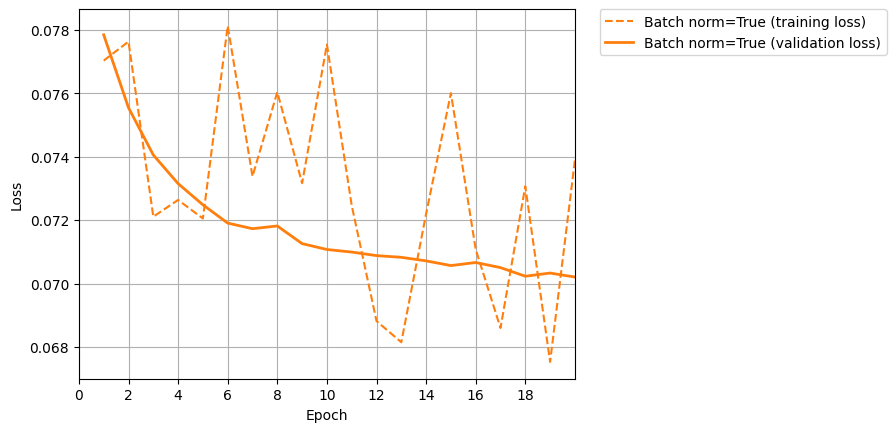

In [ ]:
# plot baseeline validation loss
plot_experiment_history(base_loss)

# plot training and validation losses for experiment 3 models
plot_experiment_history(
    loss_list=experiment_3_losses,
    label_list=['Batch norm=True'],
    title='',
    to_plot_train=True
)

# format plot
plt.xlim(1, base_num_epoch)
plt.xticks(range(0, base_num_epoch, 2))
plt.legend(fontsize='small')
plt.grid()
plt.show()

# save plot
plt.savefig("CAE-MNIST/outputs/experiment_3_files/experiment_3_image_loss.png")
plt.show()

In [ ]:
# manually add and push experiment 1 loss curve image to Git repository
!git -C /content/CAE-MNIST add outputs/experiment_2_files/experiment_2_image_loss.png
!git -C /content/CAE-MNIST commit -m "Add experiment 2 loss history curve"
!git -C /content/CAE-MNIST push origin main

### 4.2 📷 Reconstruction Quality Analysis

In [ ]:
# get sample images and labels
sample_images, sample_labels = get_image_samples(base_validation_dataloader)

# get reconstructed images from experiment 3
experiment_3_reconstructions=get_experiment_reconstructions(experiment_3_models, sample_images, device)

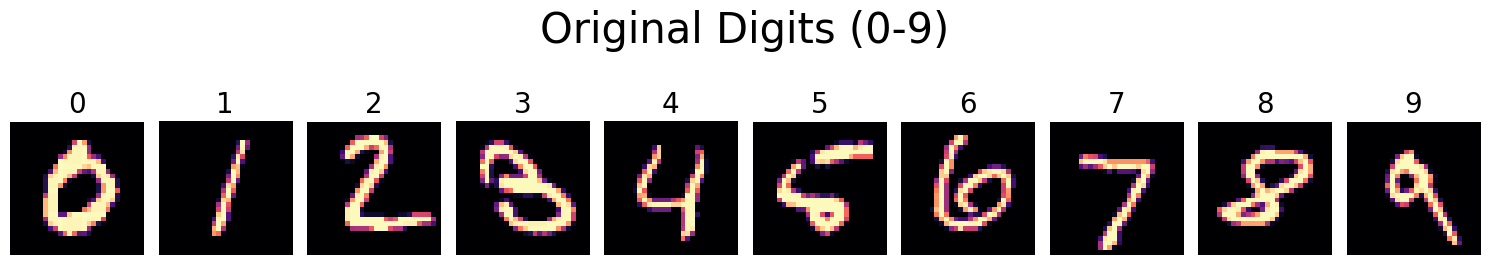

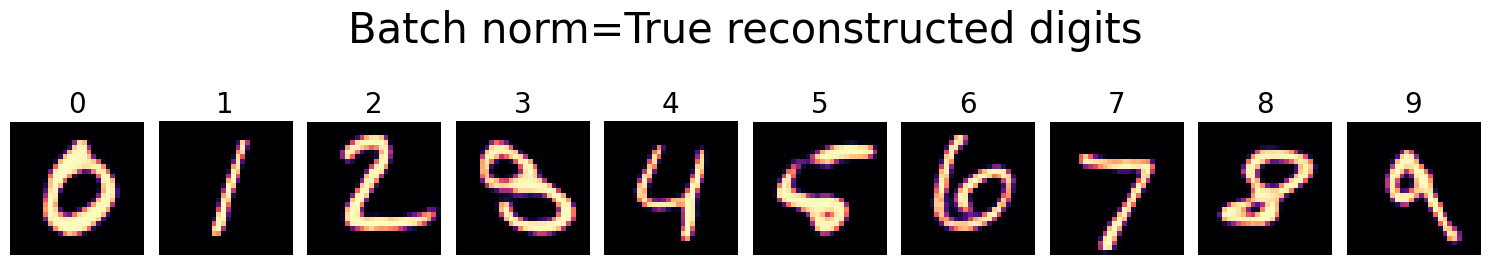

In [ ]:
# display reconsructions from baseline model
display(Image(filename='/content/CAE-MNIST/outputs/base_model_files/base_image_reconstruction.png'))
print('\n')

# display reconstructions from experiment
experiment_3_reconstruction_figures = plot_experiment_reconstructions(
    experiment_3_reconstructions,
    sample_labels,
    title_list=['Batch norm=True']
    )

for idx, fig in enumerate(experiment_3_reconstruction_figures):
  fig.savefig(f"CAE-MNIST/outputs/experiment_3_files/experiment_3_image_reconstruction_{idx+1}.png")

In [ ]:
#manually add and push experiment 3 reconstruction images to Git repository
for idx, _ in enumerate(experiment_3_reconstruction_figures):
  !git -C /content/CAE-MNIST add outputs/experiment_3_files/experiment_3_image_reconstruction_{idx+1}.png

!git -C /content/CAE-MNIST commit -m "Add experiment 3 reconstructed digits"
!git -C /content/CAE-MNIST push origin main

# 6. 📂 Export Experiment 3 Files

In [ ]:
# save all experiment 3 outputs (models, losses, reconstructions, description)
save_experiment_files(
    experiment_name="experiment_3",
    models=experiment_3_models,
    losses=experiment_3_losses,
    reconstructions=experiment_3_reconstructions,
    description_text=experiment_3_description
)

✅ Saved experiment_3 files to: /content/CAE_experiment_3_local


In [ ]:
# export experiment 3 files to Git
export_experiment_files(
    experiment_name="experiment_3",
    model_count=len(experiment_3_models)
)

## Import Experiment 3 Files

In [ ]:
# define output path for experiment 3 files
outputs_path = '/content/CAE-MNIST/outputs/experiment_3_files'

# initialize storage lists
experiment_3_models = []
experiment_3_losses = []
experiment_3_reconstructions = []

# initialize model with batch normalization enabled
model = AutoEncoder(
    n_channels=base_n_channels,
    latent_dim=base_latent_dim,
    use_batch_norm=True
).to(device)

# load model weights
model_file = 'experiment_3_model_1.pth'
model_path = os.path.join(outputs_path, model_file)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()
experiment_3_models.append(model)

# load loss history
loss_file = 'experiment_3_loss_1.pth'
loss_path = os.path.join(outputs_path, loss_file)
loss_history = torch.load(loss_path)
experiment_3_losses.append(loss_history)

# load reconstructed images
reconstructed_file = 'experiment_3_reconstruction_1.pth'
reconstructed_path = os.path.join(outputs_path, reconstructed_file)
reconstructed_images = torch.load(reconstructed_path)
experiment_3_reconstructions.append(reconstructed_images)

# load experiment description
with open(os.path.join(outputs_path, 'experiment_3_description.txt'), 'r') as f:
    experiment_3_description = f.read()

print("✅ All Experiment 3 models, losses, reconstructed images and description loaded.")

✅ All Experiment 3 models, losses, reconstructed images and description loaded.
